In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [9]:
# Let's create a sample dataset that aligns with the loyalty scorecard implementation above.
# This dataset will include columns: 'customer_id', 'purchase_date', and 'purchase_amount'.
# We will then save this as a CSV file.

import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import random

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for data generation
num_customers = 100  # Number of customers
num_transactions = 1000  # Number of transactions

# Generate sample data
customer_ids = np.random.choice(range(1, num_customers + 1), num_transactions)
purchase_dates = [datetime.now() - timedelta(days=random.randint(1, 365)) for _ in range(num_transactions)]
purchase_amounts = np.random.uniform(10, 500, num_transactions).round(2)  # Random amounts between $10 and $500

# Create DataFrame
data = pd.DataFrame({
    'customer_id': customer_ids,
    'purchase_date': purchase_dates,
    'purchase_amount': purchase_amounts
})

# Save to CSV file
csv_path = '/mnt/data/customer_data.csv'
data.to_csv(csv_path, index=False)

csv_path


'/mnt/data/customer_data.csv'

In [10]:
# Load your data
data = pd.read_csv("/mnt/data/customer_data.csv")
data.head(10)


,customer_id,purchase_date,purchase_amount
0,52,2024-06-03 19:02:59.354231,297.55
1,93,2024-01-21 19:02:59.354231,375.27
2,15,2024-03-03 19:02:59.354231,221.51
3,72,2023-12-25 19:02:59.354231,72.51
4,61,2024-08-07 19:02:59.354231,149.05
5,21,2024-06-06 19:02:59.354231,187.91
6,83,2024-03-15 19:02:59.354231,326.50
7,87,2023-12-13 19:02:59.354231,289.68
8,75,2024-08-29 19:02:59.354231,184.49
9,75,2024-09-18 19:02:59.354231,493.39


In [3]:
#Data Exploration and Preprocessing

In [11]:
# Check for missing values and clean data
data.info()
data.isnull().sum()

# Fill missing values or drop as necessary
data = data.dropna()  # Example: dropping rows with missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   int64  
 1   purchase_date    1000 non-null   object 
 2   purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


In [ ]:
#Define Loyalty Metrics

In [12]:
# Convert 'date' column to datetime if necessary
data['purchase_date'] = pd.to_datetime(data['purchase_date'])

# Calculate Recency
latest_date = data['purchase_date'].max()
data['Recency'] = (latest_date - data['purchase_date']).dt.days

# Calculate Frequency (number of purchases per customer)
frequency = data.groupby('customer_id').size()
data['Frequency'] = data['customer_id'].map(frequency)

# Calculate Average Order Value (AOV)
aov = data.groupby('customer_id')['purchase_amount'].mean()
data['AOV'] = data['customer_id'].map(aov)

# Keep only relevant columns for the scorecard
scorecard_df = data[['customer_id', 'Recency', 'Frequency', 'AOV']].drop_duplicates()
scorecard_df.head()


,customer_id,Recency,Frequency,AOV
0,52,161,12,155.574167
1,93,295,11,270.048182
2,15,253,10,315.895000
3,72,322,8,166.680000
4,61,96,12,217.743333


In [13]:
print(data.columns)


Index(['customer_id', 'purchase_date', 'purchase_amount', 'Recency',
       'Frequency', 'AOV'],
      dtype='object')


In [14]:
#Normalize the Data

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scorecard_scaled = scaler.fit_transform(scorecard_df[['Recency', 'Frequency', 'AOV']])


In [16]:
#Define a Scoring System with Clustering

In [17]:
# Initialize and fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust clusters as needed
scorecard_df['Loyalty_Segment'] = kmeans.fit_predict(scorecard_scaled)

# Map clusters to loyalty levels
scorecard_df['Loyalty_Segment'] = scorecard_df['Loyalty_Segment'].map({
    0: 'Platinum', 1: 'Gold', 2: 'Silver', 3: 'Bronze'
})

scorecard_df.head()


C:\Users\DELL\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,customer_id,Recency,Frequency,AOV,Loyalty_Segment
0,52,161,12,155.574167,Silver
1,93,295,11,270.048182,Gold
2,15,253,10,315.895000,Gold
3,72,322,8,166.680000,Silver
4,61,96,12,217.743333,Silver


In [18]:
#Visualize Loyalty Segments

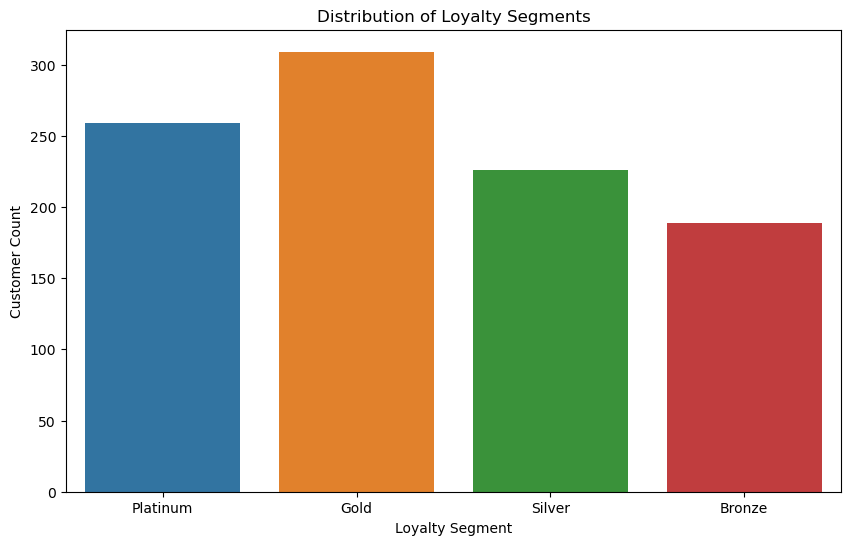

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=scorecard_df, x='Loyalty_Segment', order=['Platinum', 'Gold', 'Silver', 'Bronze'])
plt.title("Distribution of Loyalty Segments")
plt.xlabel("Loyalty Segment")
plt.ylabel("Customer Count")
plt.show()


In [ ]:
#Analyze the Segments

In [20]:
segment_analysis = scorecard_df.groupby('Loyalty_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'AOV': 'mean'
}).reset_index()

segment_analysis


,Loyalty_Segment,Recency,Frequency,AOV
0,Bronze,191.343915,16.650794,230.262989
1,Gold,281.378641,9.896440,276.950169
2,Platinum,84.911197,9.961390,286.577264
3,Silver,158.389381,9.469027,209.688736


In [21]:
#Export the Results

In [22]:
scorecard_df.to_csv("loyalty_scorecard.csv", index=False)


In [24]:
data = pd.read_csv('loyalty_scorecard.csv')
print(data)

     customer_id  Recency  Frequency         AOV Loyalty_Segment
0             52      161         12  155.574167          Silver
1             93      295         11  270.048182            Gold
2             15      253         10  315.895000            Gold
3             72      322          8  166.680000          Silver
4             61       96         12  217.743333          Silver
..           ...      ...        ...         ...             ...
978           10      122          6  314.025000        Platinum
979           67      120         10  236.512000          Silver
980           18      150          9  311.751111        Platinum
981          100      326          9  186.337778          Silver
982           86      164         15  246.021333          Bronze

[983 rows x 5 columns]
